In [2]:
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
img = Image.open("..\data\images\mitosis_img_001.jpg").convert("L").resize((320, 320))

In [4]:
torch.cuda.is_available()

True

In [5]:
a = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
convert_tensor = transforms.ToTensor()
t_img = convert_tensor(img).to(device)
print(t_img.shape)
t_images = torch.empty((0, a, a)).to(device)
for i in tqdm(range(320-a)):
    for k in (range(320-a)):
        temp = transforms.functional.crop(t_img, k, i, a, a)
        t_images = torch.cat((t_images, temp), axis = 0)

torch.Size([1, 320, 320])


100%|██████████| 288/288 [01:20<00:00,  3.57it/s]


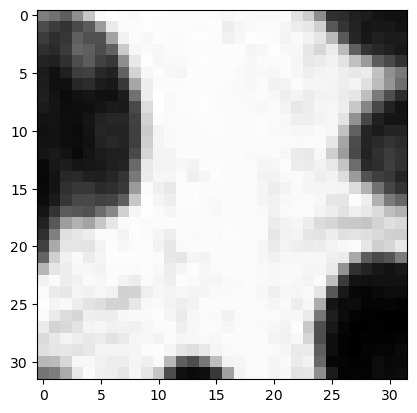

In [6]:
plt.imshow(t_images[99].cpu(), cmap='gray')

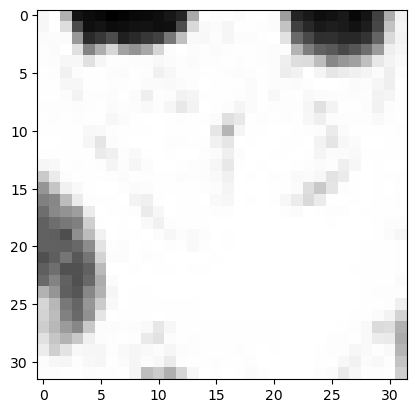

In [7]:
plt.imshow(t_images[0].cpu(), cmap='gray')